In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. Data Collection
I collected this data from kaggle. The train.csv has 2000 records and test.csv has 1000 records

# 2. Data Cleaning
Address issues such as missing values, duplicate entries, outliers, and inconsistencies in the dataset.

# 3. Exploratory Data Analysis
Analyze the dataset to understand its structure, distribution, patterns, and anomalies. Tools include descriptive statistics, visualization, and correlation analysis.


In [38]:
df = pd.read_csv("train.csv")
column_rename_mapping = { #rename few columns for readability
    'blue': 'bluetooth', 'fc': 'front_camera','m_dep': 'mobile_depth',
    'pc': 'primary_camera','sc_h': 'screen_ht','sc_w': 'screen_width',
}
df.rename(columns = column_rename_mapping, inplace = True)

print("df.head()=\n",df.head())
print("#########################")
print("df.shape=",df.shape)
print("#########################")
df.info()
print("#########################")
print("df.describe()=\n",df.describe())

df.head()=
    battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0            842          0          2.2         0             1       0   
1           1021          1          0.5         1             0       1   
2            563          1          0.5         1             2       1   
3            615          1          2.5         0             0       0   
4           1821          1          1.2         0            13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  ...  px_height  px_width  \
0           7           0.6        188        2  ...         20       756   
1          53           0.7        136        3  ...        905      1988   
2          41           0.9        145        5  ...       1263      1716   
3          10           0.8        131        6  ...       1216      1786   
4          44           0.6        141        2  ...       1208      1212   

    ram  screen_ht  screen_width  talk_time  three_g  touch_screen  

We observe that:
1) battery_power,clock_speed,front_camera,int_memory,mobile_depth,
   mobile_wt,n_cores,px_height,px_width,ram,screen_ht,screen_width,talk_time
   are numerical values
2) 'bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi' are
   boolean values
3) There are no missing values
4) Battery Power: Ranges from 501 to 1998 with mean of 1238.52, indicating that the
    battery power of the devices varies significantly.
## Target variable analysis

df['price_range'].value_counts()=
 price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


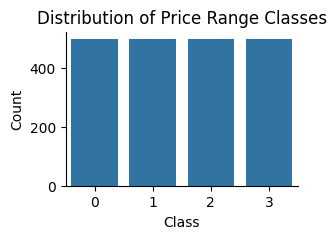

In [4]:
print("df['price_range'].value_counts()=\n",df['price_range'].value_counts())

plt.figure(figsize=(3, 2))  # Width of 3 inches and height of 2 inches
sns.countplot(x="price_range", data=df)
plt.title("Distribution of Price Range Classes", fontsize=12)
plt.xlabel("Class", fontsize=10)
plt.ylabel("Count", fontsize=10)
sns.despine()

We Observe that the 4 classes are equally distributed in training set.

## Univariate analysis of Numerical and Boolean features
### Numerical Feature

In [5]:
numerical_features =["battery_power","clock_speed","front_camera","int_memory", 
                     "mobile_depth","mobile_wt", "n_cores", "px_height",
                     "px_width","ram","screen_ht","screen_width","talk_time"] 
numerical_df = df[numerical_features]

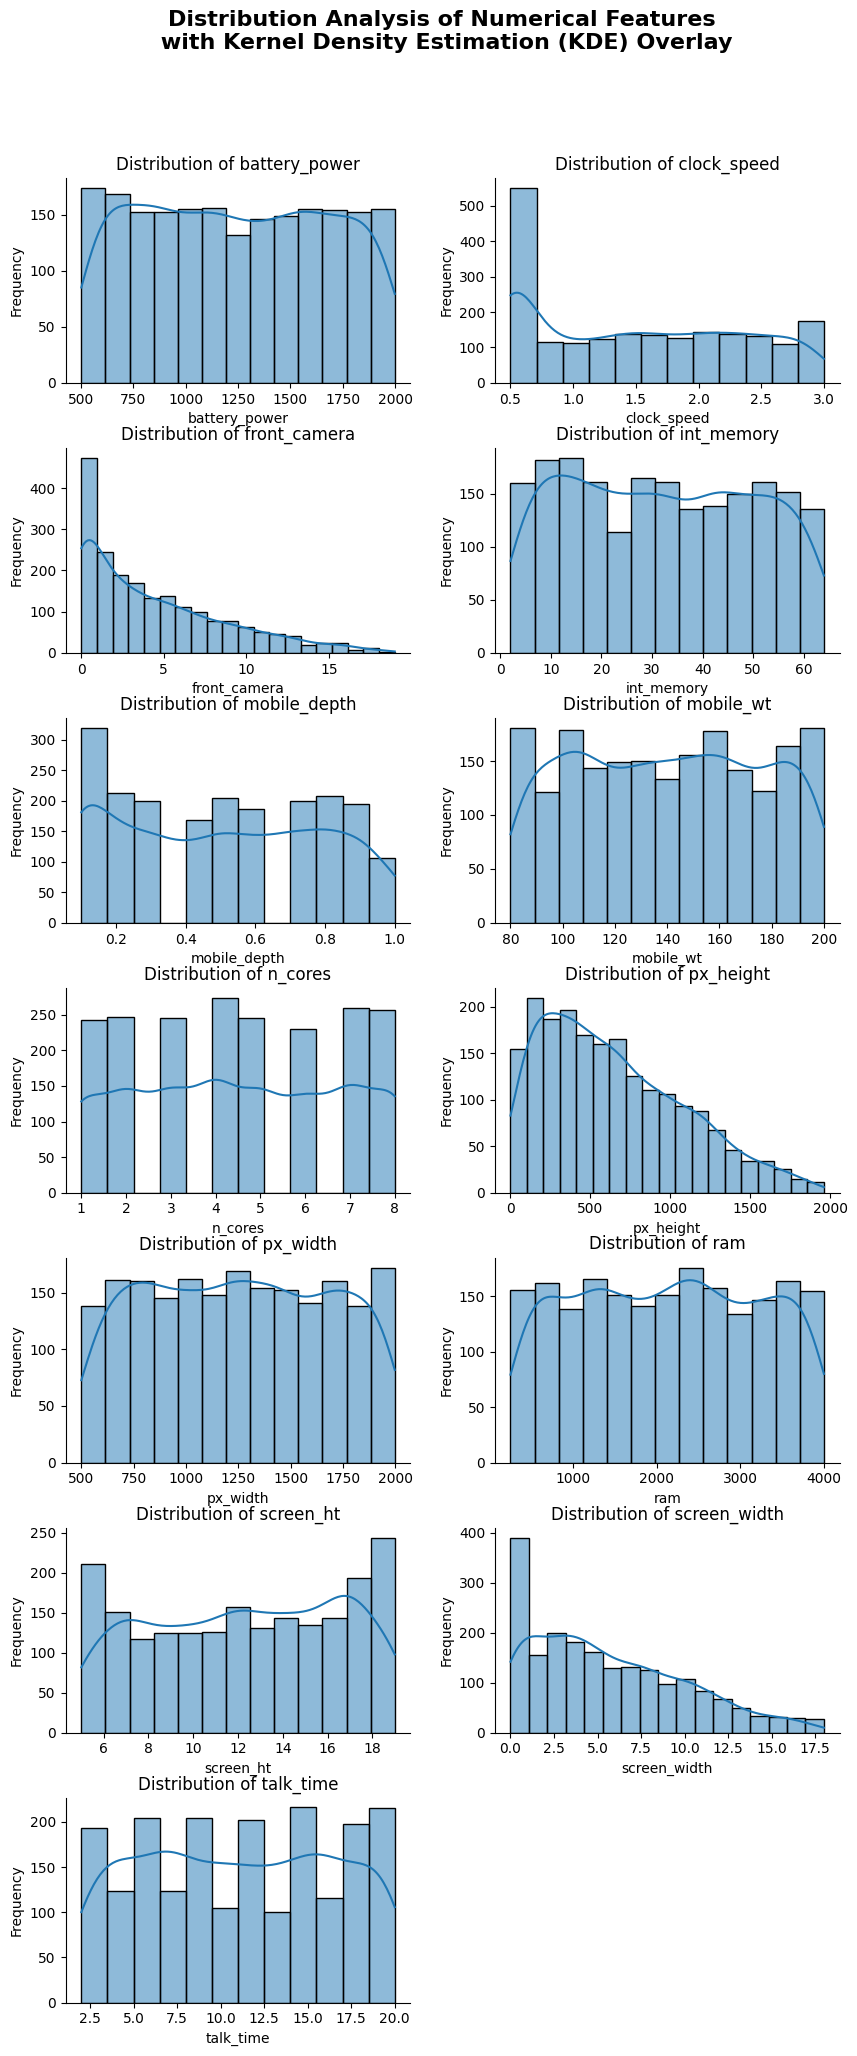

In [37]:
num_features = len(numerical_features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, num_rows * 3))  
fig.tight_layout(pad=3.0)  # Reduced padding between subplots
fig.subplots_adjust(top=0.9)  # Keep space for the title

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(numerical_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)  
    axes[i].set_xlabel(feature, fontsize=10)  
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Distribution Analysis of Numerical Features\n with Kernel Density Estimation (KDE) Overlay",
    fontsize=16, fontweight='bold'
)
plt.show()


### outlier detection

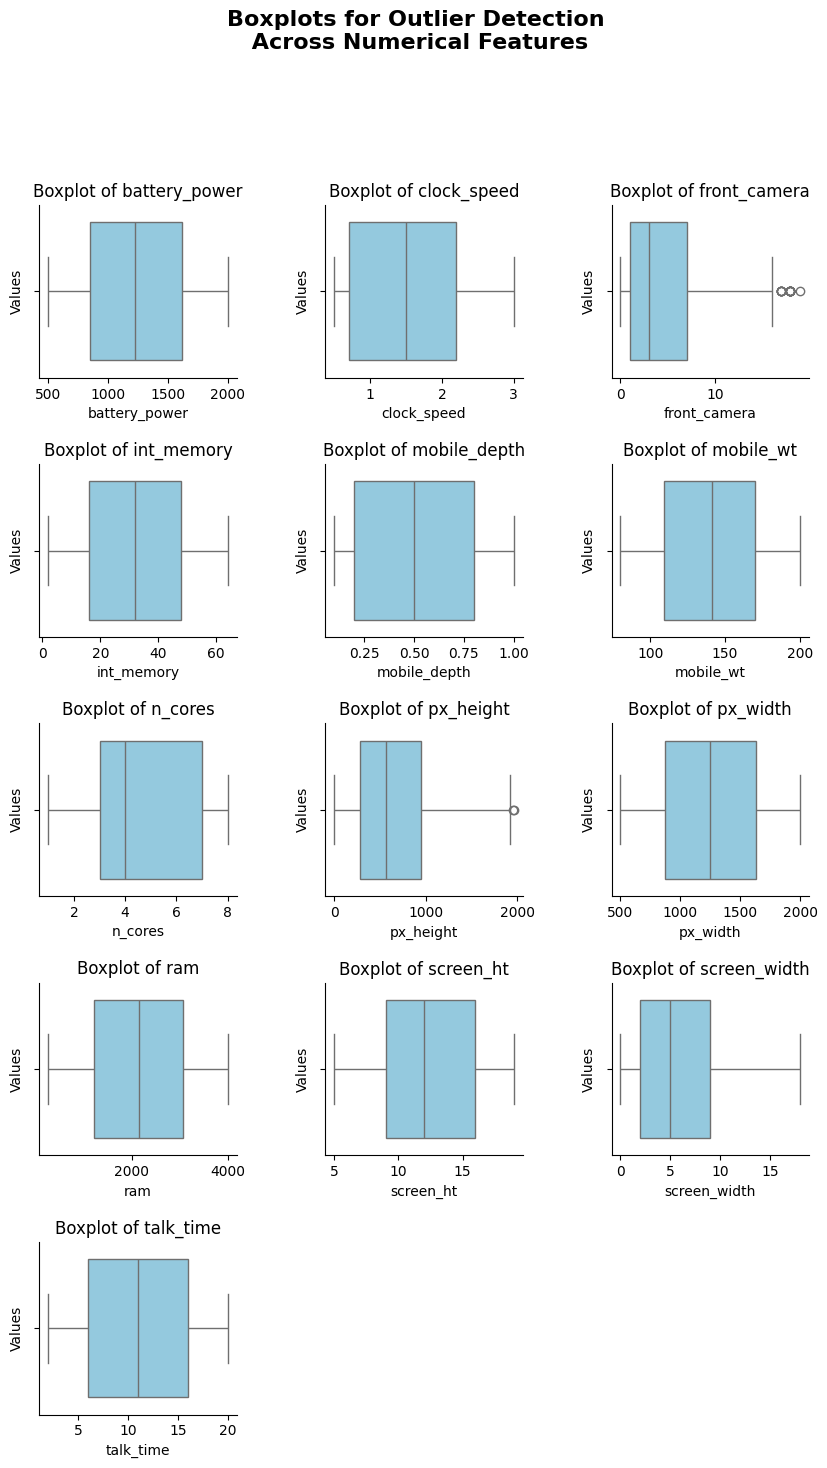

In [7]:
num_features = len(numerical_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, num_rows * 3))  # Smaller figure size
fig.tight_layout(pad=3.0)          # Base padding
fig.subplots_adjust(hspace=0.5,    # Increased vertical spacing between rows
                    top=0.85)      # Adjust space for the main title

axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=numerical_df[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {feature}', fontsize=12)  # Smaller title font
    axes[i].set_xlabel(feature, fontsize=10)  # Smaller xlabel font
    axes[i].set_ylabel('Values', fontsize=10)  # Smaller ylabel font
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Boxplots for Outlier Detection\n Across Numerical Features",
    fontsize=16,  # Reduced main title font size
    fontweight='bold'
)
plt.show()

### Boolean Features

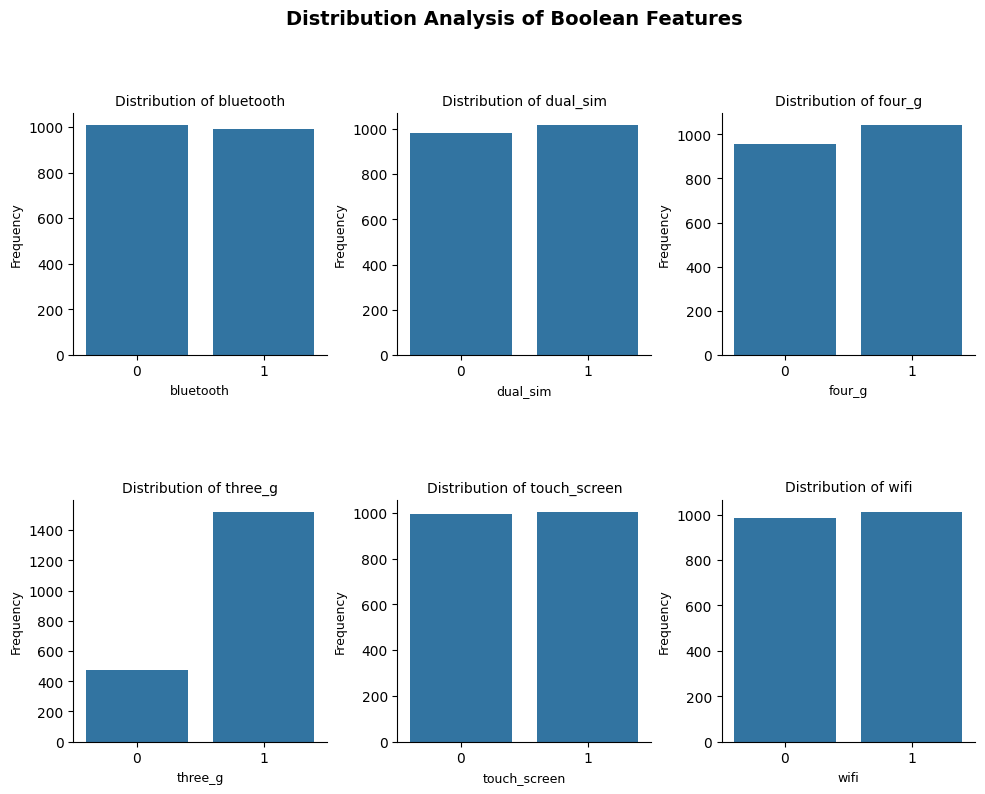

In [8]:
# Boolean features to plot
boolean_features = ['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
boolean_df = df[boolean_features]

# Set up a 3x3 grid layout to fit all 7 features
num_features = len(boolean_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)  # 3 rows needed for 7 features

# Create subplots with a smaller figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))  # Smaller figure size
fig.tight_layout(pad=2.0)  # Base padding between subplots
fig.subplots_adjust(top=0.85, hspace=0.6)  # Increased vertical space between rows

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot the countplots
for i, feature in enumerate(boolean_features):
    sns.countplot(x=feature, data=boolean_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)  # Smaller title font
    axes[i].set_xlabel(feature, fontsize=9)  # Smaller xlabel font
    axes[i].set_ylabel('Frequency', fontsize=9)  # Smaller ylabel font
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Add a title for the entire figure
fig.suptitle(
    "Distribution Analysis of Boolean Features",
    fontsize=14,  # Smaller main title font size
    fontweight='bold'
)

# Display the plot
plt.show()


## Bivariate analysis of Target vs Numerical and Boolean features
### Target vs Numerical features

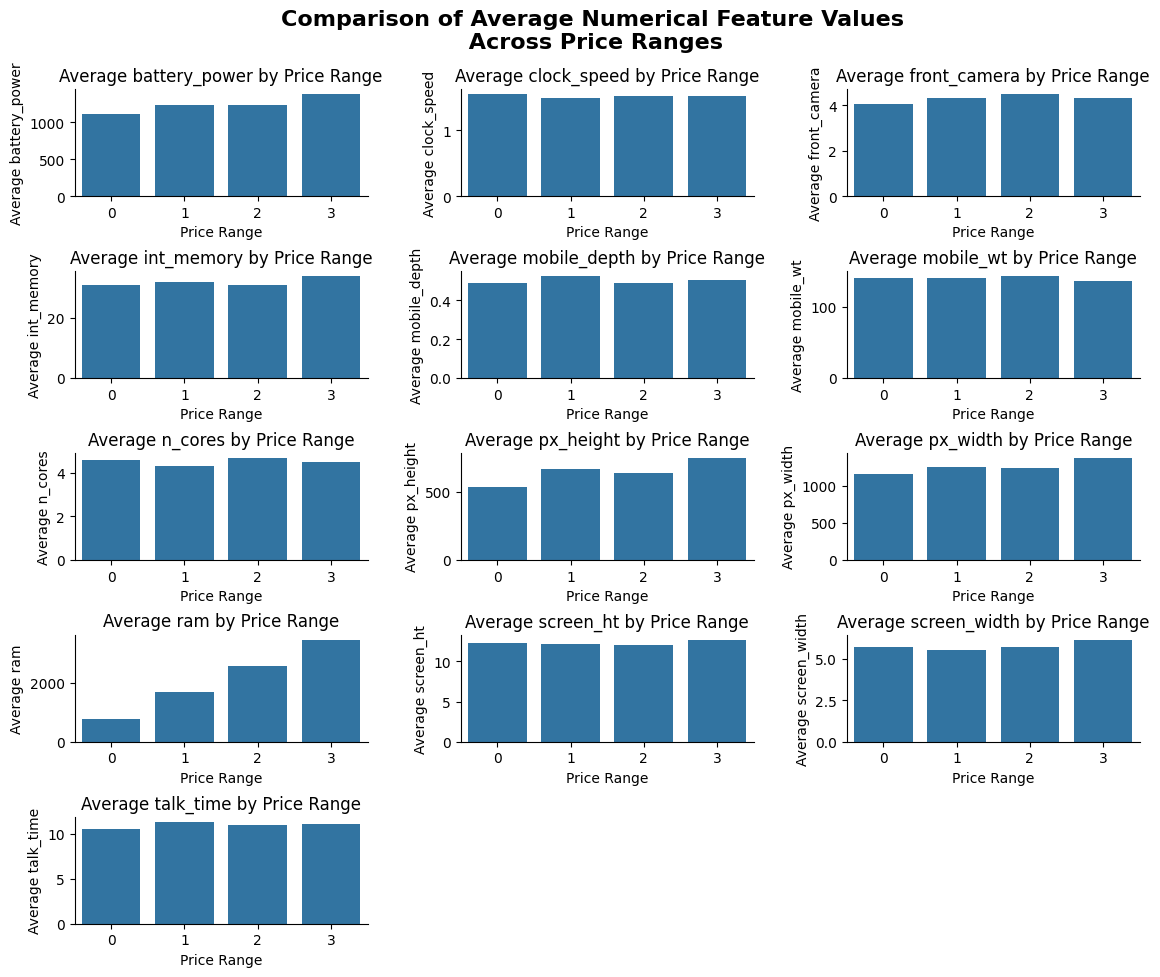

In [9]:
Price_range_mean = df.pivot_table(
    index = "price_range",
    values = numerical_features,
    aggfunc = "mean"
)

# Set up a 3x3 grid layout for the plots
num_features = len(numerical_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)  # Ensure enough rows for the features

# Create subplots with a smaller figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))  # Smaller figure size
fig.tight_layout(pad=3.0)  # Base padding between subplots
fig.subplots_adjust(top=0.9, hspace=0.7)  # Add vertical space between rows

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the barplots
for i, feature in enumerate(numerical_features):
    sns.barplot(
        x=Price_range_mean.index,
        y=Price_range_mean.loc[:, feature],
        ax=axes[i]
    )
    axes[i].set_title(f'Average {feature} by Price Range', fontsize=12)  # Smaller title font
    axes[i].set_xlabel('Price Range', fontsize=10)  # Smaller xlabel font
    axes[i].set_ylabel(f'Average {feature}', fontsize=10)  # Smaller ylabel font
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Add a title for the entire figure
fig.suptitle(
    "Comparison of Average Numerical Feature Values\n Across Price Ranges",
    fontsize=16,  # Smaller main title font size
    fontweight='bold'
)

# Display the plot
plt.show()


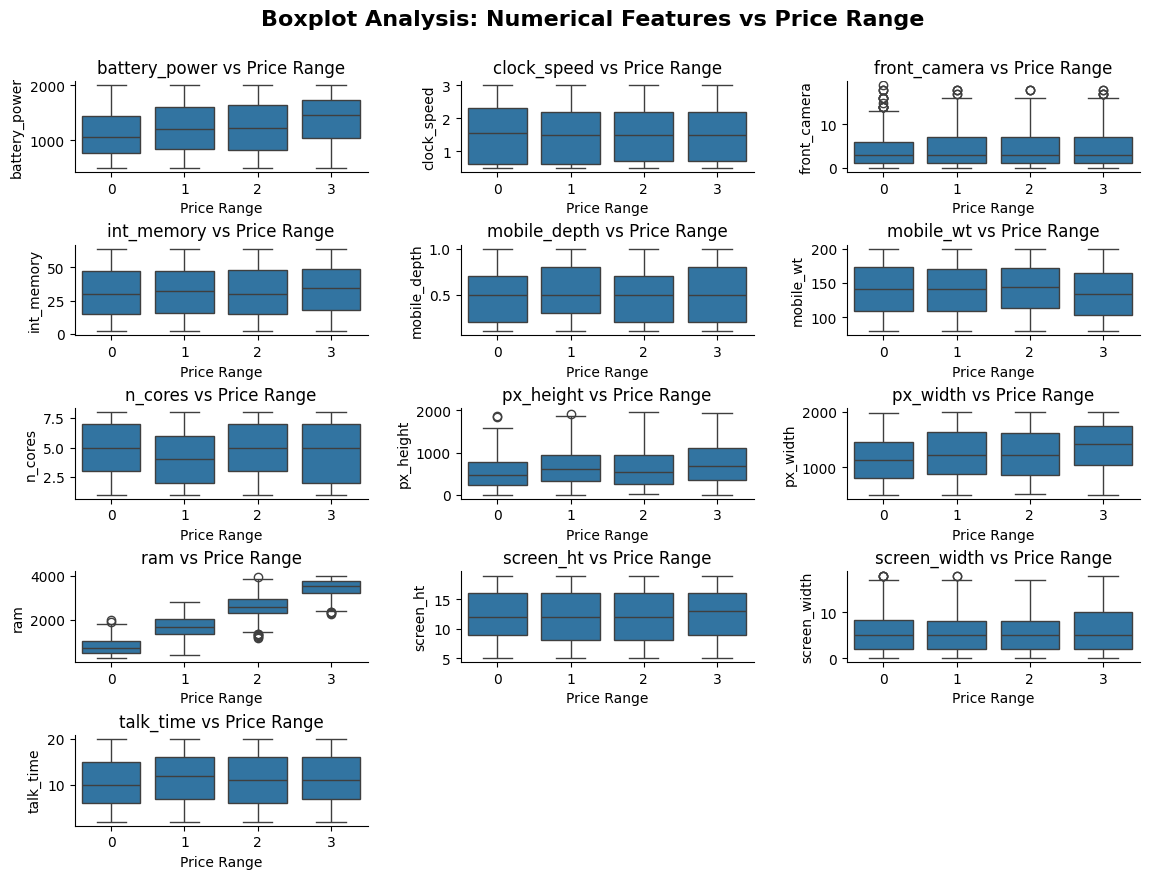

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set up a 3x3 grid layout to fit all the features
num_features = len(numerical_features) # Get the number of features
num_cols = 3  # Set 3 columns
num_rows = math.ceil(num_features / num_cols) # Calculate the number of rows needed

# Create subplots with a smaller figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))  
fig.tight_layout(pad=3.0)  # Reduced padding between subplots
fig.subplots_adjust(top=0.9, hspace=0.8)  # Increased vertical space between rows

axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.boxplot( data=df, x='price_range', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs Price Range', fontsize=12)  # Smaller title font
    axes[i].set_xlabel('Price Range', fontsize=10)  # Smaller xlabel font
    axes[i].set_ylabel(feature, fontsize=10)  # Smaller ylabel font
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Boxplot Analysis: Numerical Features vs Price Range",
    fontsize=16, fontweight='bold'
)
plt.show()


## Target vs Boolean features

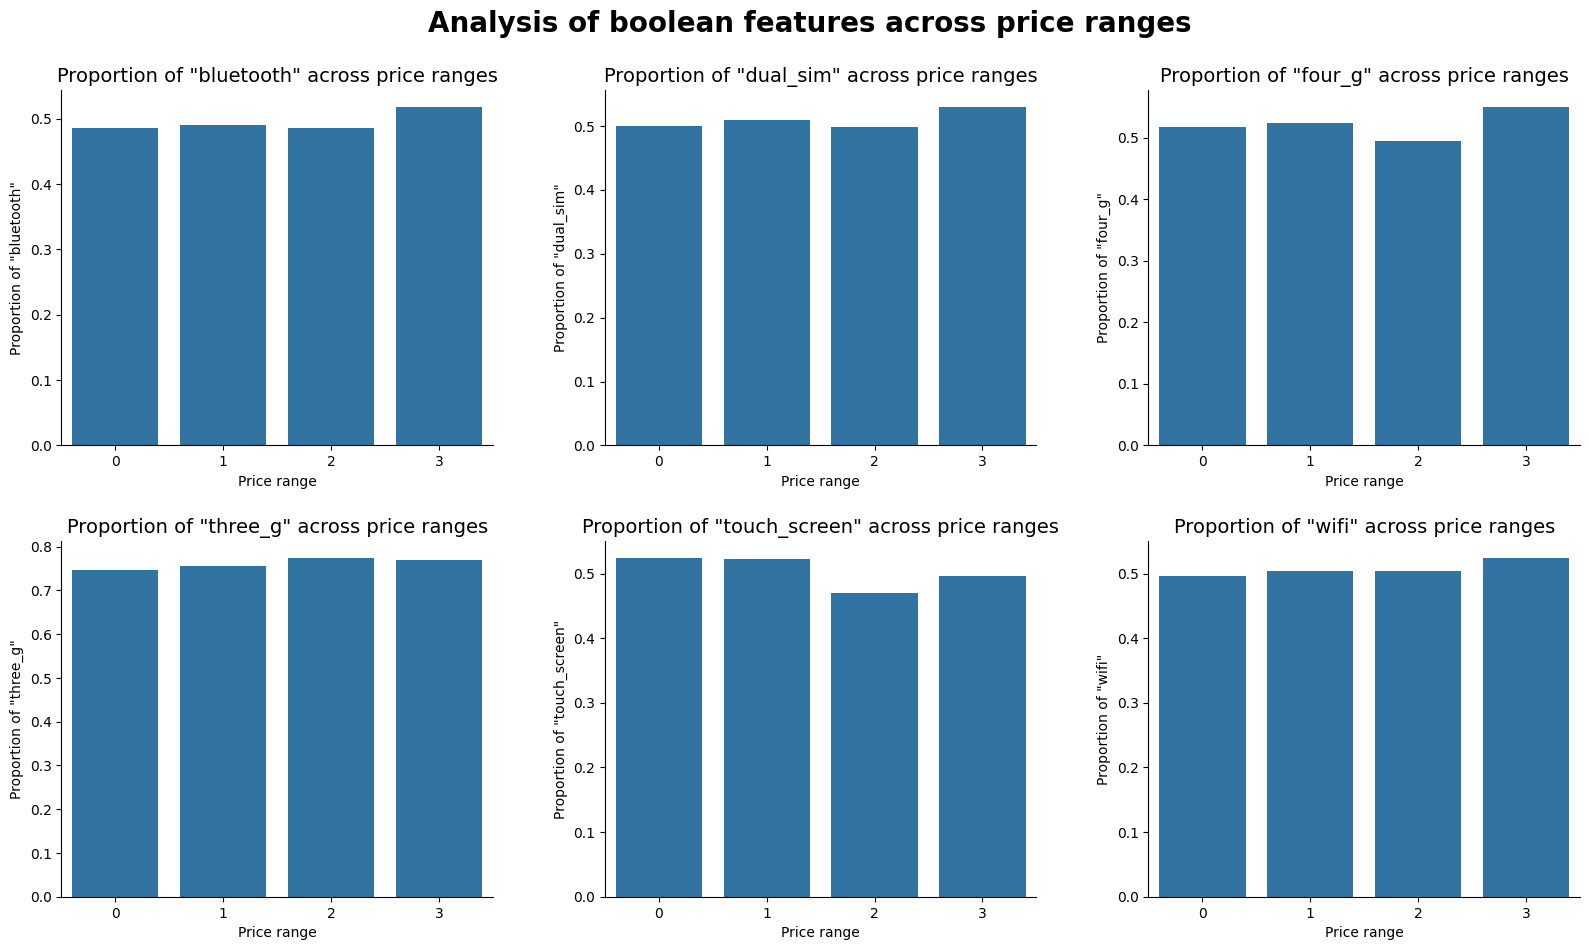

In [11]:
# Number of boolean features
num_features = len(boolean_features)

num_cols = 3  # 3 columns
num_rows = math.ceil(num_features / num_cols)  # Adjust rows accordingly

# Calculate proportions of True values for each boolean feature across price ranges
Price_range_bool = df[boolean_features].groupby(df['price_range']).mean()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 10))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.9)

axes = axes.flatten()
for i, feature in enumerate(boolean_features):
    sns.barplot(
        x=Price_range_bool.index,
        y=Price_range_bool[feature],
        ax=axes[i],
    )
    axes[i].set_title(f'Proportion of "{feature}" across price ranges', fontsize=14)
    axes[i].set_xlabel('Price range')
    axes[i].set_ylabel(f'Proportion of "{feature}"')
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)

# Remove any unused subplots if there are fewer features than axes
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Analysis of boolean features across price ranges",
             fontsize=20, fontweight='bold')
plt.show()


## Correlation Analysis

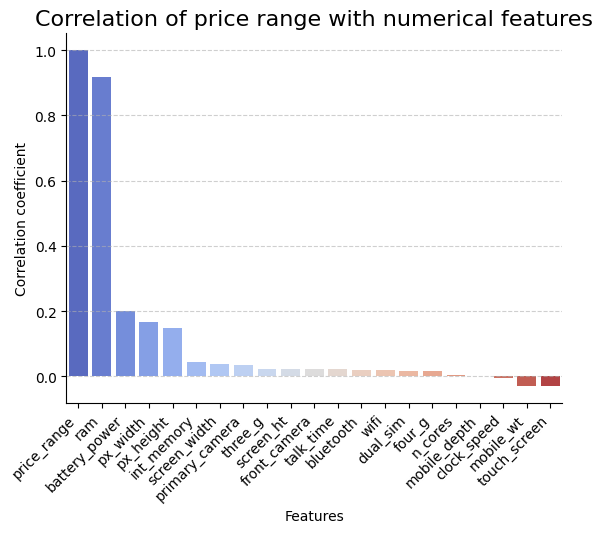

In [12]:
correlation_matrix = df.corr()

price_range_corr = correlation_matrix['price_range'].sort_values(ascending = False)

sns.barplot(
    x = price_range_corr.index,
    y = price_range_corr.values, 
    palette = 'coolwarm',
    legend=False,
    hue=price_range_corr.index
)
sns.despine()
plt.title('Correlation of price range with numerical features', fontsize = 16)
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

## Multivariate analysis

C:\Users\hi\AppData\Local\Temp\ipykernel_14320\3624270394.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = "Price range", fontsize = 12, title_fontsize = 14, loc = 'upper right', markerscale = 1.5)


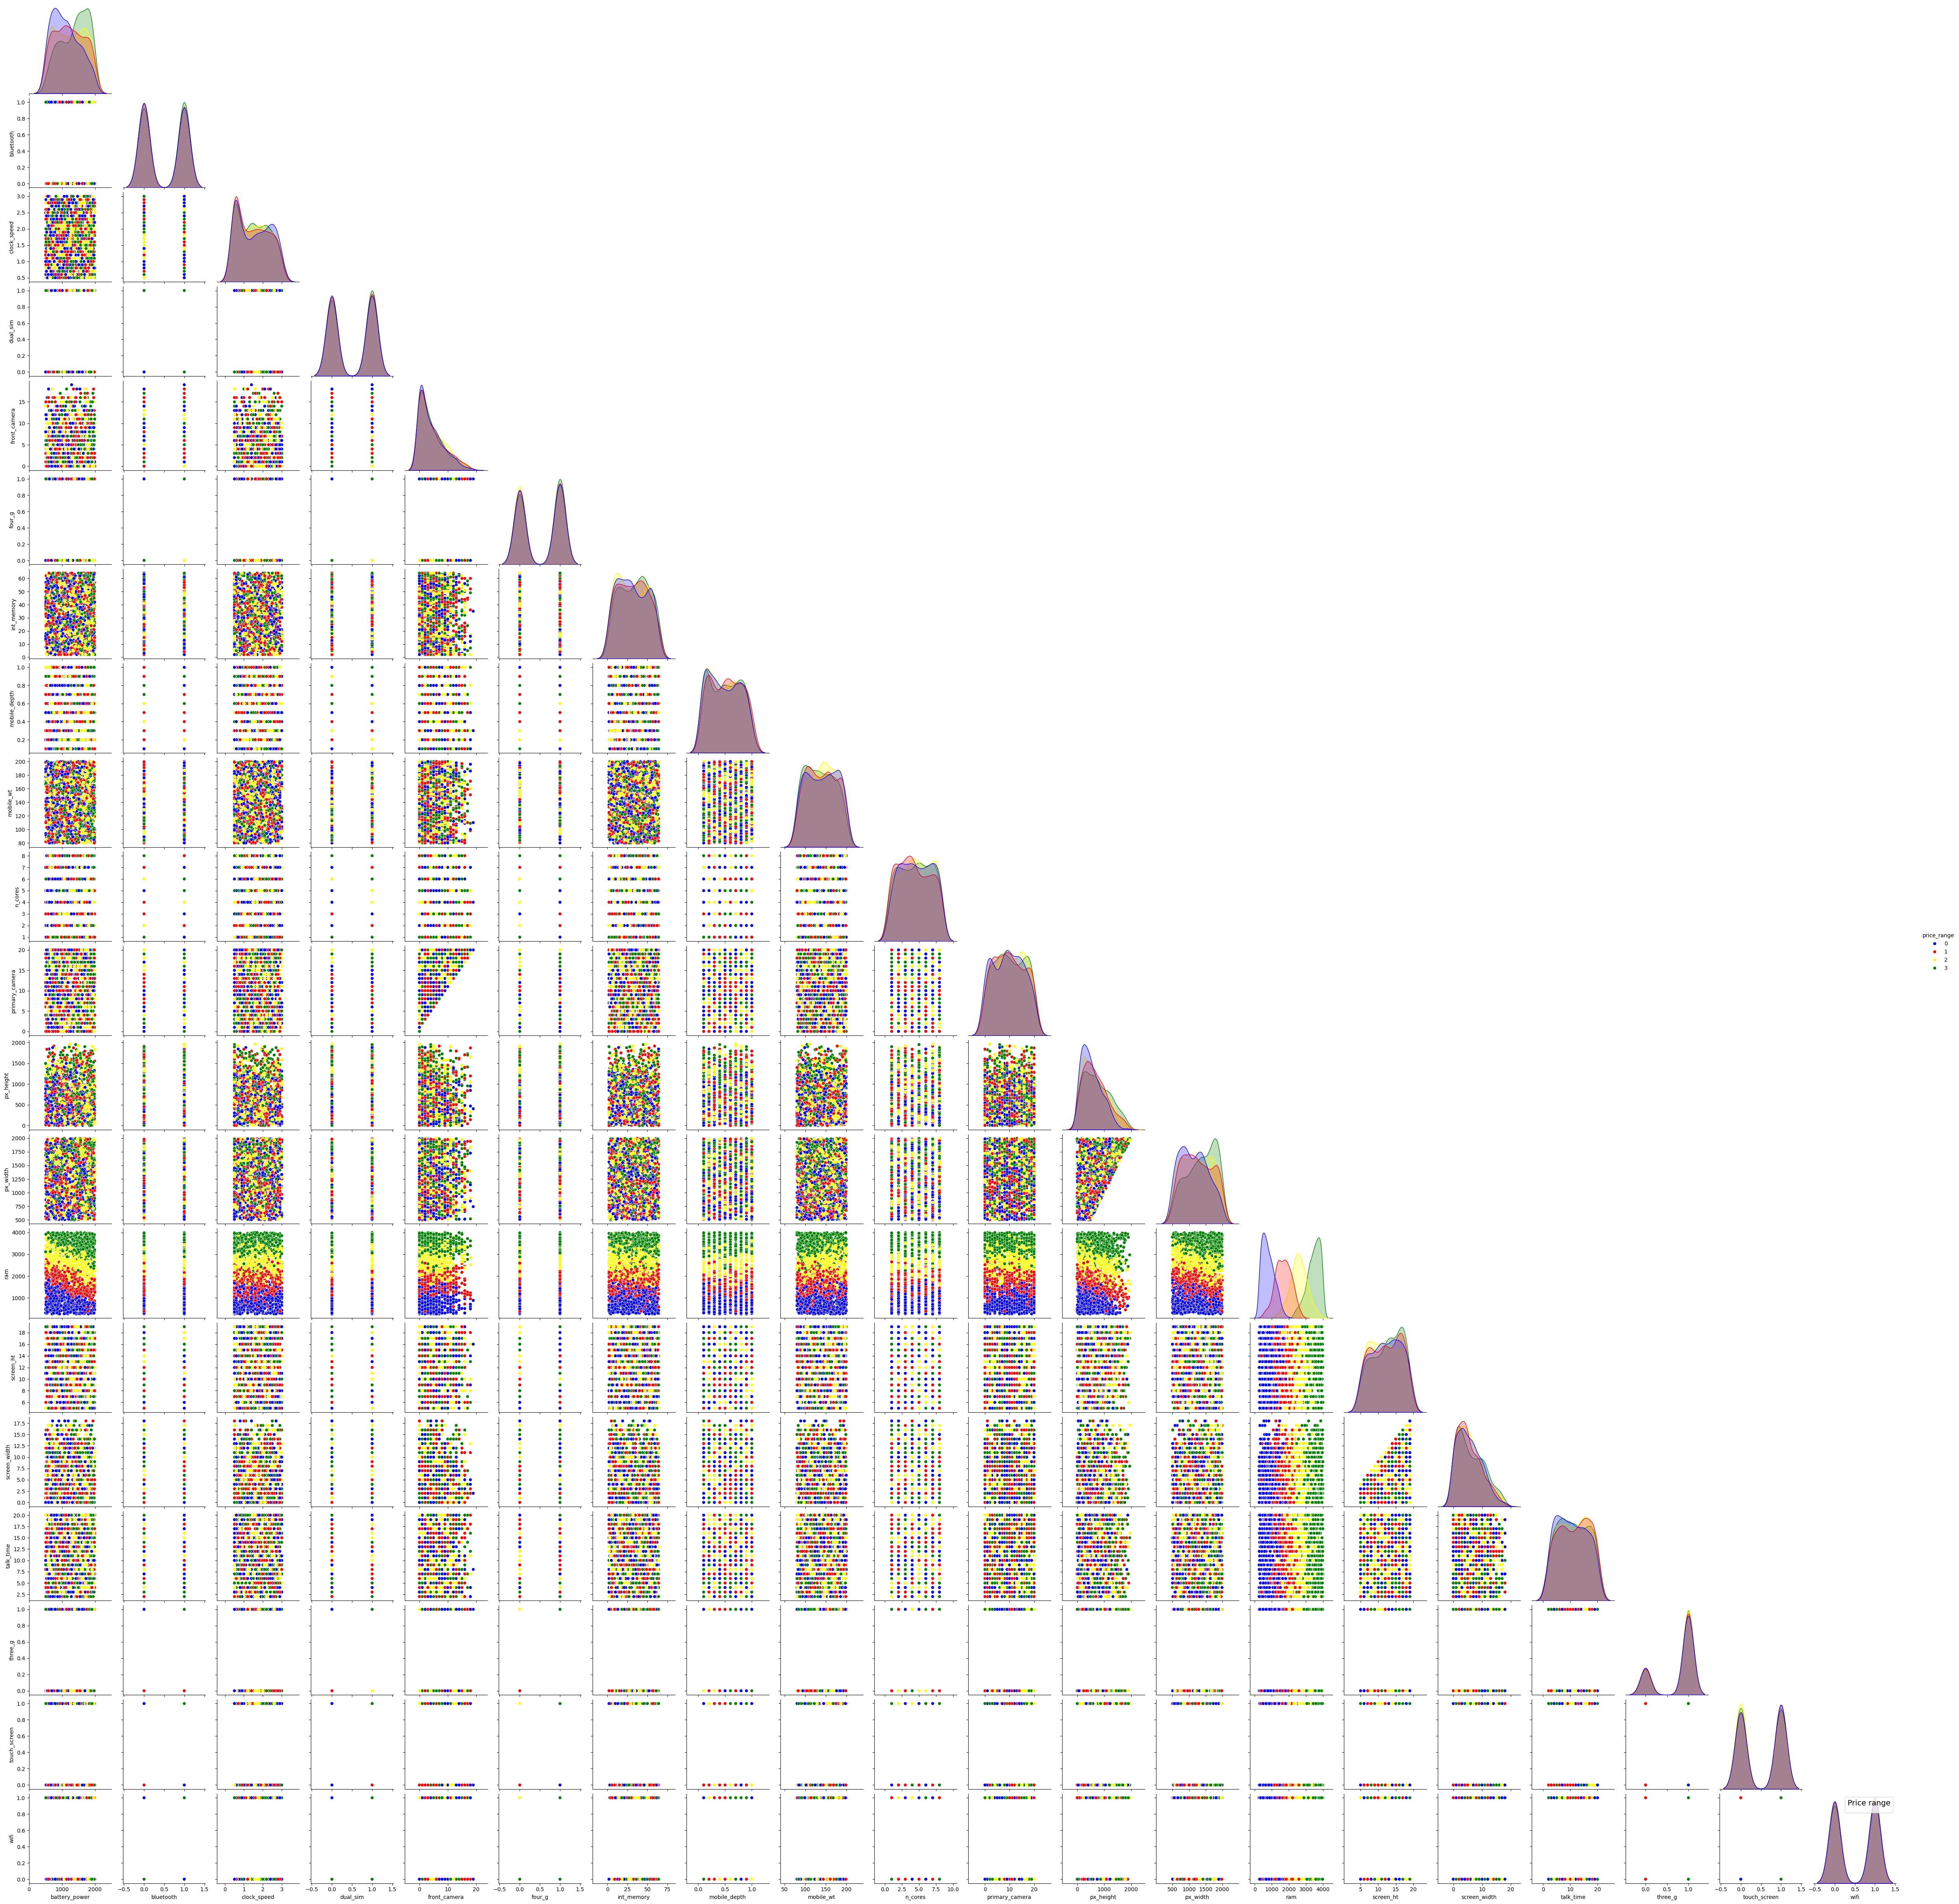

In [13]:
custom_palette = { 0: "blue", 1: "red", 2: "yellow", 3: "green"}
sns.pairplot(df, hue = "price_range", corner = True, palette = custom_palette)
plt.legend(title = "Price range", fontsize = 12, title_fontsize = 14, loc = 'upper right', markerscale = 1.5)
plt.show() #NOTE TOOK 30-50 seconds for plot

# 4. Feature Engineering
Create a new feature: Pixels and Diagonal using px_height, px_width, screen_ht, screen_width. Then remove these 4 features.

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

df_model = df.copy()
df_model = df_model.assign(
    Pixels = df_model["px_height"] * df_model["px_width"],
    Diagonal = (df_model["screen_ht"] ** 2 + df_model["screen_width"] ** 2) ** 0.5,
)
print("df_model.head()=\n",df_model.head())

df_model.head()=
    battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0            842          0          2.2         0             1       0   
1           1021          1          0.5         1             0       1   
2            563          1          0.5         1             2       1   
3            615          1          2.5         0             0       0   
4           1821          1          1.2         0            13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  ...   ram  screen_ht  \
0           7           0.6        188        2  ...  2549          9   
1          53           0.7        136        3  ...  2631         17   
2          41           0.9        145        5  ...  2603         11   
3          10           0.8        131        6  ...  2769         16   
4          44           0.6        141        2  ...  1411          8   

   screen_width  talk_time  three_g  touch_screen  wifi  price_range   Pixels  \
0    

In [15]:

X = df_model.drop(columns = ['price_range', 'px_height', 'px_width', 'screen_ht', 'screen_width'])
y = df_model['price_range']


# 5. Data Splitting
#### Stratified K-Folds cross-validation 
Technique for splitting a dataset into multiple parts (or "folds") for model evaluation, specifically for classification problems.
This technique ensures that the splits are representative of the class distribution in the dataset, making it useful when the dataset has imbalanced classes.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# 6. Data Preprocessing
Prepare data for modeling through:
* Scaling/normalization for numerical features.
* Encoding categorical variables.
* Handling imbalanced datasets (e.g., SMOTE or undersampling).

# 7. Model Selection
# 8. Model Training
# 9. Model Evaluation

### Logistic Regression

In [24]:
from sklearn.multiclass import OneVsRestClassifier

# Scaling the features (StandardScaler for Logistic Regression and Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Logistic Regression with OneVsRestClassifier
log_reg = LogisticRegression(random_state=42, solver='lbfgs')  
log_reg_ovr = OneVsRestClassifier(estimator=log_reg)  

log_reg_scores = cross_validate(log_reg_ovr, X_scaled, y_train, cv=cv, scoring=scoring, return_train_score=False)

print("\nLogistic Regression scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {log_reg_scores['test_' + metric].mean():.4f}")



Logistic Regression scores:
Accuracy: 0.8262
Precision_weighted: 0.8209
Recall_weighted: 0.8262
F1_weighted: 0.8214


### Random Forest Classifier

In [28]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 42)
rf_scores = cross_validate(random_forest, X_train, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nRandom Forest scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {rf_scores['test_' + metric].mean():.4f}")


Random Forest scores:
Accuracy: 0.8662
Precision_weighted: 0.8674
Recall_weighted: 0.8662
F1_weighted: 0.8660


### KNN

In [29]:
# Normalization (MinMaxScaler for KNN)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_train)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_scores = cross_validate(knn, X_normalized, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nKNN scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {knn_scores['test_' + metric].mean():.4f}")


KNN scores:
Accuracy: 0.3969
Precision_weighted: 0.4130
Recall_weighted: 0.3969
F1_weighted: 0.3952


### Naive bayes

In [26]:
# Naive Bayes Classifier (GaussianNB)
naive_bayes = GaussianNB()
nb_scores = cross_validate(naive_bayes, X_scaled, y_train, cv = cv, scoring = scoring, return_train_score = False)

print("\nNaive Bayes scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {nb_scores['test_' + metric].mean():.4f}")


Naive Bayes scores:
Accuracy: 0.8006
Precision_weighted: 0.8043
Recall_weighted: 0.8006
F1_weighted: 0.8013


### Validating the random forest model
Random forest model gave us the better result.

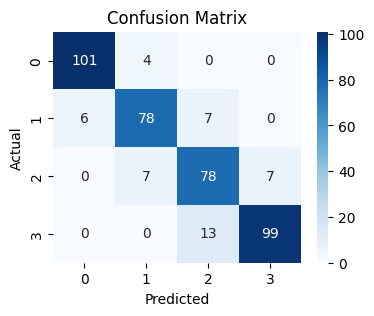


Final Random Forest Model Evaluation (on test set):
Accuracy: 0.8900
Precision (weighted): 0.8917
Recall (weighted): 0.8900
F1 Score (weighted): 0.8904


In [31]:
# Fit the Random Forest model on the training data
random_forest.fit(X_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

# Predict on the test set
y_pred = random_forest.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the results
print("\nFinal Random Forest Model Evaluation (on test set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

## Prediction on test set

In [34]:
df_test = pd.read_csv("test.csv")
df_test.rename(columns = column_rename_mapping, inplace = True)
df_test.drop("id", axis = 1, inplace = True)

df_test = df_test.assign(
    Pixels = df_test["px_height"] * df_test["px_width"],
    Diagonal = (df_test["screen_ht"] ** 2 + df_test["screen_width"] ** 2) ** 0.5,
)

X_predict = df_test.drop(columns = ['px_height', 'px_width', 'screen_ht', 'screen_width'])

scaler = StandardScaler()
X_predict_scaled = scaler.fit_transform(X_predict) 

predictions = random_forest.predict(X_predict_scaled)

df_test["Predicted Price Range"] = predictions

df_test.to_excel("predicted_price_ranges.xlsx", index=False)  
print("Predictions saved to 'predicted_price_ranges.xlsx'")

Predictions saved to 'predicted_price_ranges.xlsx'
